In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import os


In [1]:
df = pd.read_csv("C:/Users/andrei.savescu/Untitled Folder/concatenated_data_all.csv")

NameError: name 'pd' is not defined

In [3]:
df

,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,959",98.29,NaN
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,NaN,NaN,Coronavirus-vs-VitaminaC,NaN,NaN,NaN,NaN,"66,009",17.33,NaN
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,998",31.76,NaN
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,994",268.63,NaN
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"52,881",13.21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950446,2022-06-30,stiripesurse.ro,stiripesurse.ro,679218552100812,NEWS_SITE,RO,Cea mai rapidă sursă de informații și știri. Î...,2014-01-31 14:06:38,658827.0,863198.0,...,NaN,NaN,Un nou abandon la Wimbledon din cauza DOVID-19,Spaniolul Roberto Bautista Agut a anunțat joi ...,NaN,NaN,NaN,NaN,NaN,-47.5
950447,2022-06-30,pesurse.ro,pesurse.ro,179523662073502,NEWS_SITE,RO,Aproape tot ce se intampla la tv si nu e dat i...,2010-12-10 23:35:42,28736.0,28244.0,...,NaN,NaN,Un nou abandon la Wimbledon din cauza DOVID-19,Spaniolul Roberto Bautista Agut a anunțat joi ...,NaN,NaN,NaN,NaN,NaN,-14.0
950448,2022-06-30,Sinteza Zilei Oficial,SintezaZileiOficial,1703600396518671,TV_SHOW,RO,"Pagina oficială a emisiunii Sinteza Zilei, rea...",2016-02-10 09:16:23,91369.0,139020.0,...,NaN,NaN,Crește numărul cazurilor COVID în România! Adr...,Numărul cazurilor de COVID a crescut considera...,NaN,NaN,NaN,NaN,NaN,1.42
950449,2022-06-30,Antena 3,Antena3Oficial,2046461195600068,NEWS_SITE,RO,Antena 3 este cea mai urmărită televiziune de ...,2018-02-16 14:31:50,155838.0,315635.0,...,NaN,NaN,Crește numărul cazurilor COVID în România! Adr...,Numărul cazurilor de COVID a crescut considera...,NaN,NaN,NaN,NaN,NaN,1.19


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950451 entries, 0 to 950450
Data columns (total 46 columns):
 #   Column                                                                                                              Non-Null Count   Dtype    
---  ------                                                                                                              --------------   -----    
 0   Post Created Date                                                                                                   950451 non-null  object   
 1   Page Name                                                                                                           950451 non-null  object   
 2   User Name                                                                                                           918668 non-null  object   
 3   Facebook Id                                                                                                         950451 non-null  int64    
 

In [11]:
df["Message"]

0         Și-a dat jos costumul și cravata de președinte...
1         🍋 Despre Vitamina C - tot ce s-a intamplat au ...
2         O sa fie bine Chiar cred asta. M-am născut în ...
3         Aşa arată faţa unui medic după o zi de muncă g...
4         ❗️❗️❗️VĂ RUGĂM SĂ NE SPRIJINIȚI PRIN DISTRIBUI...
                                ...                        
950446    Spaniolul Roberto Bautista Agut a anunțat joi ...
950447    Spaniolul Roberto Bautista Agut a anunțat joi ...
950448    Numărul cazurilor de COVID a crescut considera...
950449    Numărul cazurilor de COVID a crescut considera...
950450    Printre aceste țări se regăsesc Franța, Portug...
Name: Message, Length: 950451, dtype: object

# Analiza de Sentiment

In [55]:
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import itertools
import collections
import string
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist

In [8]:
nltk.download('punkt')

nltk.download('stopwords')


nltk.download('wordnet')

nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andrei.savescu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrei.savescu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andrei.savescu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andrei.savescu\AppData\Roaming\nltk_data...


True

# Eliminare diacritice

In [52]:
import unicodedata

for index, row in df.iterrows():
    text = row['Message'] # Postarile se află în coloana 'Message'
    text_normalizat = unicodedata.normalize('NFKD', text)
    text_fara_diacritice = text_normalizat.encode('ASCII', 'ignore').decode('ASCII')
    df.at[index, 'Message'] = text_fara_diacritice 


In [53]:
df.to_csv("fisier_fara_diacritice.csv", index=False)

In [8]:
df_n = pd.read_csv("fisier_fara_diacritice.csv")
df_n

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_82416\2916123730.py:1: DtypeWarning: Columns (13,37,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_n = pd.read_csv("fisier_fara_diacritice.csv")


,Post Created Date,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post
0,2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,...,NaN,NaN,"99,959",98.29,NaN,2020,3,2020-03-24,2020-03,Si-a jos costumul si cravata presedinte si imb...
1,2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,...,NaN,NaN,"66,009",17.33,NaN,2020,3,2020-03-11,2020-03,Despre Vitamina C - s-a intamplat aprobarea i...
2,2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,...,NaN,NaN,"57,998",31.76,NaN,2020,3,2020-03-16,2020-03,O bine Chiar cred asta. M-am nascut si cand a...
3,2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,...,NaN,NaN,"53,994",268.63,NaN,2020,3,2020-03-15,2020-03,Asa arata fata medic munca grea salvarea vieti...
4,2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,...,NaN,NaN,"52,881",13.21,NaN,2020,3,2020-03-11,2020-03,VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949884,2022-06-30,stiripesurse.ro,stiripesurse.ro,679218552100812,NEWS_SITE,RO,Cea mai rapidă sursă de informații și știri. Î...,2014-01-31 14:06:38,658827.0,863198.0,...,NaN,NaN,NaN,NaN,-47.5,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...
949885,2022-06-30,pesurse.ro,pesurse.ro,179523662073502,NEWS_SITE,RO,Aproape tot ce se intampla la tv si nu e dat i...,2010-12-10 23:35:42,28736.0,28244.0,...,NaN,NaN,NaN,NaN,-14.0,2022,6,2022-06-30,2022-06,Spaniolul Roberto Bautista Agut anuntat joi s-...
949886,2022-06-30,Sinteza Zilei Oficial,SintezaZileiOficial,1703600396518671,TV_SHOW,RO,"Pagina oficială a emisiunii Sinteza Zilei, rea...",2016-02-10 09:16:23,91369.0,139020.0,...,NaN,NaN,NaN,NaN,1.42,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...
949887,2022-06-30,Antena 3,Antena3Oficial,2046461195600068,NEWS_SITE,RO,Antena 3 este cea mai urmărită televiziune de ...,2018-02-16 14:31:50,155838.0,315635.0,...,NaN,NaN,NaN,NaN,1.19,2022,6,2022-06-30,2022-06,Numarul cazurilor COVID crescut considerabil u...


In [48]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949889 entries, 0 to 949888
Data columns (total 47 columns):
 #   Column                                                                                                              Non-Null Count   Dtype  
---  ------                                                                                                              --------------   -----  
 0   Post Created Date                                                                                                   949889 non-null  object 
 1   Page Name                                                                                                           949889 non-null  object 
 2   User Name                                                                                                           918110 non-null  object 
 3   Facebook Id                                                                                                         949889 non-null  int64  
 4   Page Cat

In [14]:
df_n['year'] = pd.DatetimeIndex(df_n['Post Created Date']).year
df_n['month'] = pd.DatetimeIndex(df_n['Post Created Date']).month
df_n['date'] =  pd.to_datetime(df_n['Post Created Date']).dt.strftime('%Y-%m-%d')

df_n['month_year'] = pd.to_datetime(df_n['Post Created Date']).dt.to_period('M')
df_n= df_n[df_n['Message'].notna()]
print(df_n)

       Post Created Date                               Page Name  \
0             2020-03-24                          Floriana Jucan   
1             2020-03-11                       Dr. Mihail Pautov   
2             2020-03-16                          Codin Maticiuc   
3             2020-03-15               Sarbatori alaturi de tine   
4             2020-03-11  Ministerul Afacerilor Interne, Romania   
...                  ...                                     ...   
949884        2022-06-30                         stiripesurse.ro   
949885        2022-06-30                              pesurse.ro   
949886        2022-06-30                   Sinteza Zilei Oficial   
949887        2022-06-30                                Antena 3   
949888        2022-06-30                                   Ea.md   

                  User Name       Facebook Id            Page Category  \
0          iamflorianajucan   100044342683507               JOURNALIST   
1              doctormihail   34064

In [15]:
stop_words = stopwords.words("romanian")

df_n['clean_post'] = df_n['Message'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
df_n['clean_post'] = df_n['clean_post'].str.replace('\d+', '')

df_n["clean_post"]

0         Si-a jos costumul cravata presedinte imbracat ...
1         Despre Vitamina C - s-a intamplat aprobarea in...
2         O bine Chiar cred asta. M-am nascut 1980 aproa...
3         Asa arata medic munca grea salvarea vietii bol...
4         VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
                                ...                        
949884    Spaniolul Roberto Bautista Agut anuntat joi s-...
949885    Spaniolul Roberto Bautista Agut anuntat joi s-...
949886    Numarul cazurilor COVID crescut considerabil u...
949887    Numarul cazurilor COVID crescut considerabil u...
949888    Printre tari regasesc Franta, Portugalia, Ital...
Name: clean_post, Length: 949882, dtype: object

# Tokenizare

In [7]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_no_urls = [remove_url(text) for text in df_n['clean_post']]
df_no_urls[:1]

lower_case = [word.lower() for word in df_n]
sentences = df_n['clean_post']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

[['sia',
  'jos',
  'costumul',
  'cravata',
  'presedinte',
  'imbracat',
  'echipamentul',
  'covid',
  'vizita',
  'medicii',
  'pacientii'],
 ['despre',
  'vitamina',
  'c',
  'sa',
  'intamplat',
  'aprobarea',
  'inceperea',
  'studiu',
  'administreaza',
  'doze',
  'uriase',
  'vitamina',
  'c',
  'intravenos',
  'bolnavilor',
  'covid',
  'momentan',
  'nicio',
  'raportare',
  'doza',
  'studiu',
  'echivalenta',
  'pahare',
  'apa',
  'turnata',
  'lamaie',
  'in',
  'cert',
  'solutia',
  'in',
  'rest',
  'lamaia',
  'buna',
  'viata',
  'trebuie',
  'folosita',
  'pana',
  'acum']]

In [11]:
# List of all words
all_words_no_urls = list(itertools.chain(*words_in_df))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(20)

[('covid', 733450),
 ('persoane', 229484),
 ('in', 209522),
 ('cazuri', 198731),
 ('coronavirus', 157086),
 ('romania', 150339),
 ('pana', 143652),
 ('de', 118448),
 ('ani', 115298),
 ('sa', 102250),
 ('zile', 101899),
 ('ore', 100743),
 ('ultimele', 97403),
 ('numarul', 91287),
 ('urgenta', 89114),
 ('mare', 86683),
 ('impotriva', 85415),
 ('pacienti', 82009),
 ('confirmate', 80252),
 ('perioada', 79802)]

In [8]:
stop_words = stopwords.words('romanian')
stop_words.extend(["sa", "sia","de","in", "pana","c", "i"])
# Remove stop words from each list of words
df_nsw = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]

df_nsw[0]


['jos',
 'costumul',
 'cravata',
 'presedinte',
 'imbracat',
 'echipamentul',
 'covid',
 'vizita',
 'medicii',
 'pacientii']

In [31]:
df_n["clean_post"].to_csv("text.csv", index= False)

In [33]:
text_doc = pd.read_csv("text.csv")

In [36]:
text_doc = text_doc.dropna()

In [40]:
text_doc = text_doc.astype(str)

In [9]:
# Flatten list of words
all_words_nsw_nc = list(itertools.chain(*df_nsw))

# Create counter of words
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(20)

[('covid', 733450),
 ('persoane', 229484),
 ('cazuri', 198731),
 ('coronavirus', 157086),
 ('romania', 150339),
 ('ani', 115298),
 ('zile', 101899),
 ('ore', 100743),
 ('ultimele', 97403),
 ('numarul', 91287),
 ('urgenta', 89114),
 ('mare', 86683),
 ('impotriva', 85415),
 ('pacienti', 82009),
 ('confirmate', 80252),
 ('perioada', 79802),
 ('decese', 76860),
 ('astazi', 76263),
 ('pandemiei', 74181),
 ('sanatate', 73128)]

# Lematizare

In [33]:
import spacy

nlp = spacy.load("ro_core_news_sm")

In [29]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [30]:
df_n['lemmatized_text'] = df_n['clean_post'].apply(lemmatize_text)
df_n['lemmatized_text']

KeyboardInterrupt: 

In [10]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw

,words,count
0,covid,733450
1,persoane,229484
2,cazuri,198731
3,coronavirus,157086
4,romania,150339
...,...,...
95,martie,33445
96,spital,32960
97,masura,32864
98,prahova,32597


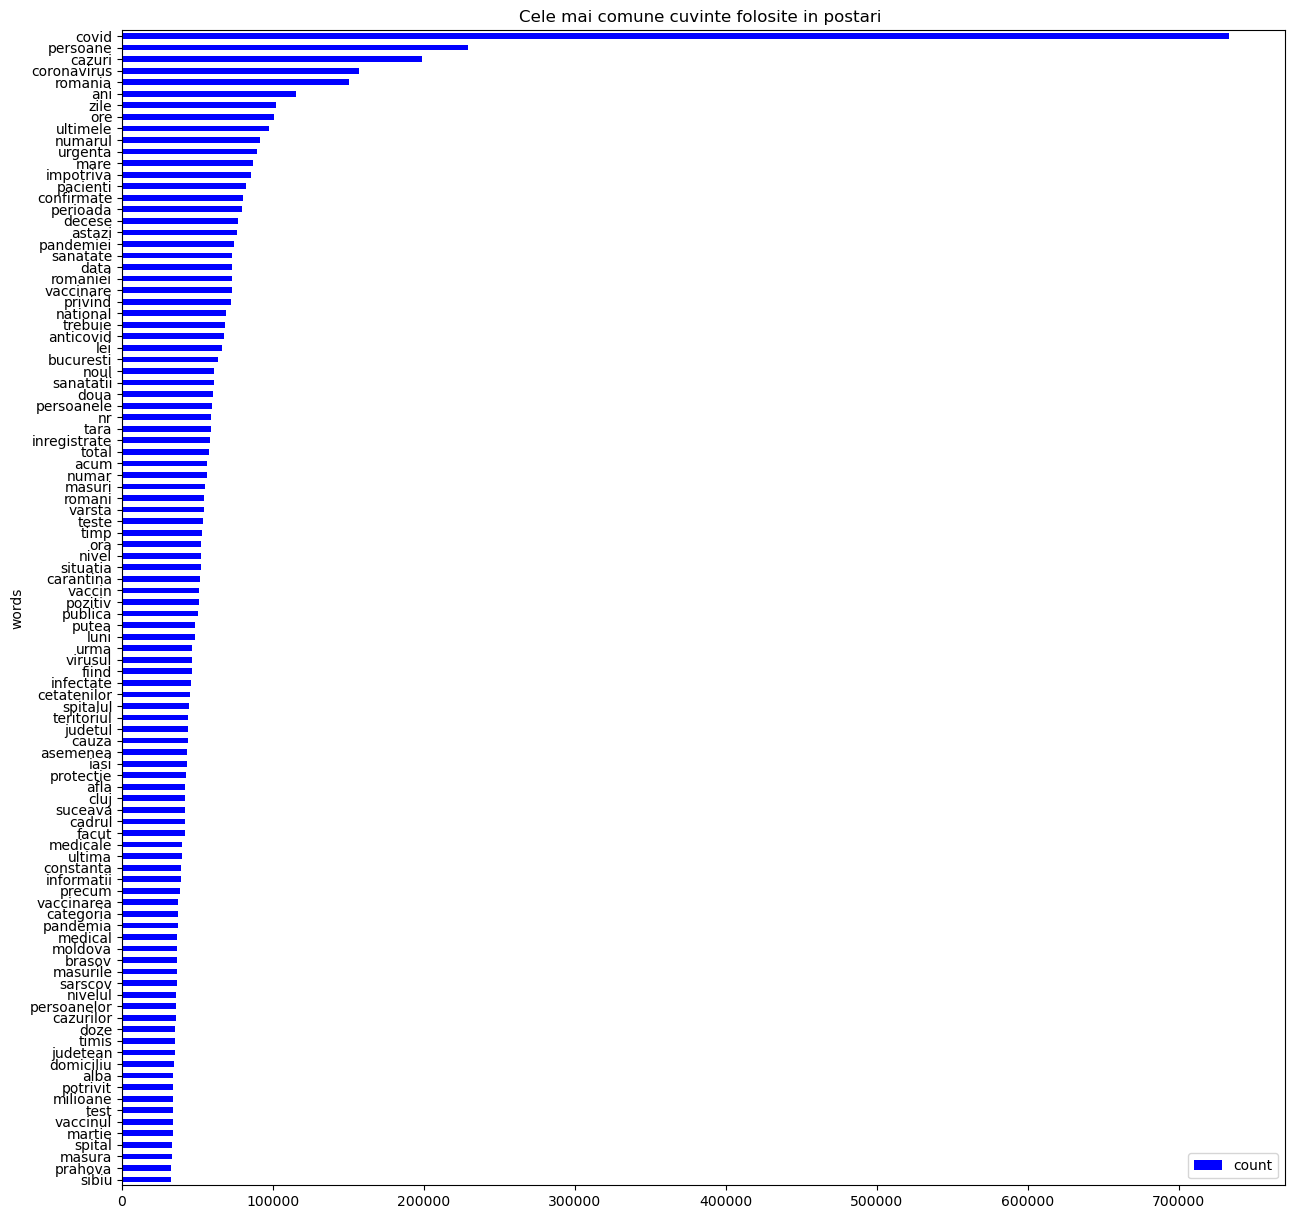

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Cele mai comune cuvinte folosite in postari ")

plt.show()

In [47]:
text = clean_df_ncw.iloc[:, 0]
text

0           covid
1        persoane
2          cazuri
3     coronavirus
4         romania
         ...     
95         martie
96         spital
97         masura
98        prahova
99          sibiu
Name: words, Length: 100, dtype: object

# WordCloud

<Figure size 640x480 with 0 Axes>

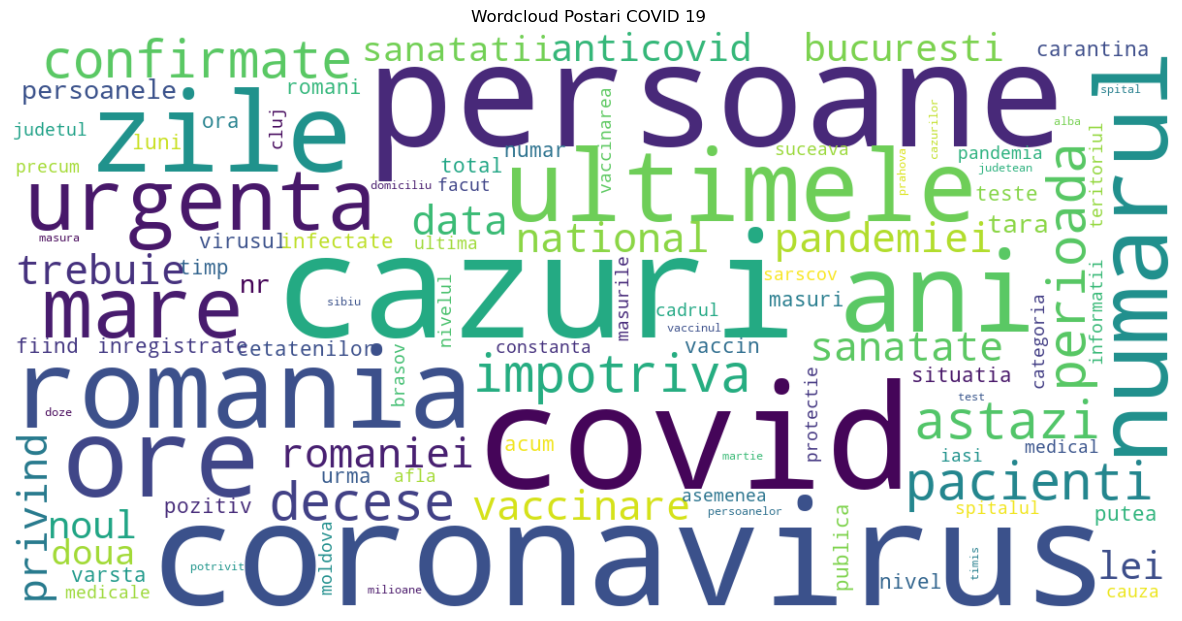

In [48]:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
title="Wordcloud Postari COVID 19 "
plt.title(title)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")

# Extragere Sentiment

In [49]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

In [51]:
df_results = pd.DataFrame(sentimentScore(df_n['clean_post']))
df_n=pd.merge(df_n, df_results, left_index=True, right_index=True)
df_n.set_index('Post Created Date', inplace=True)

In [52]:
df_n

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),year,month,date,month_year,clean_post,neg,neu,pos,compound
Post Created Date,,,,,,,,,,,,,,,,,,,,,
2020-03-24,Floriana Jucan,iamflorianajucan,100044342683507,JOURNALIST,RO,"Viaţa mea a fost câteodată fiară, câteodată fl...",2010-03-25 10:40:42,47142.0,54517.0,2020-03-24 16:25:54 EET,...,NaN,2020,3,2020-03-24,2020-03,Si-a jos costumul cravata presedinte imbracat ...,0.000,1.000,0.000,0.0000
2020-03-11,Dr. Mihail Pautov,doctormihail,340640989728926,SURGEON,RO,"Medic Specialist, Chirurgie Generala",2017-09-13 19:05:42,NaN,NaN,2020-03-11 17:52:32 EET,...,NaN,2020,3,2020-03-11,2020-03,Despre Vitamina C - s-a intamplat aprobarea in...,0.000,1.000,0.000,0.0000
2020-03-16,Codin Maticiuc,codin.maticiuc,100050227700665,PERSON,RO,Pagina pentru ganduri. Ale mele.,2015-10-28 12:52:12,409651.0,426078.0,2020-03-16 12:04:25 EET,...,NaN,2020,3,2020-03-16,2020-03,O bine Chiar cred asta. M-am nascut aproape i...,0.006,0.978,0.016,0.6144
2020-03-15,Sarbatori alaturi de tine,sarbatoriimpreuna,100064316577159,GOVERNMENT_ORGANIZATION,RO,Fă din orice zi o sărbătoare. Iubește-L pe Dum...,2014-11-23 00:07:27,728372.0,743782.0,2020-03-15 20:28:11 EET,...,NaN,2020,3,2020-03-15,2020-03,Asa arata medic munca grea salvarea vietii bol...,0.000,1.000,0.000,0.0000
2020-03-11,"Ministerul Afacerilor Interne, Romania",ministeruldeinterne,100069007606112,GOVERNMENT_ORGANIZATION,RO,Bine ati venit pe pagina oficială de Facebook ...,2013-01-14 13:01:36,422419.0,437808.0,2020-03-11 15:21:04 EET,...,NaN,2020,3,2020-03-11,2020-03,VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,Stirile TVF,StirileTVF,502924469811709,MEDIA_NEWS_COMPANY,RO,"Bun venit pe pagina de Facebook, Stirile TVF, ...",2014-04-01 17:07:45,27022.0,30690.0,2022-06-30 15:54:49 EEST,...,-26.0,2022,6,2022-06-30,2022-06,"Valul coronavirus, toamna. Valul pandemiei C...",0.000,1.000,0.000,0.0000
2022-06-30,China Xinhua News,xinhua.romania,901291599942809,MEDIA_NEWS_COMPANY,CN,Xinhua News Agency 新华通讯社 @XHNews\nXinhua News ...,2015-07-15 20:57:48,92734169.0,92735981.0,2022-06-30 15:55:51 EEST,...,-21.0,2022,6,2022-06-30,2022-06,"Odata controlul efectiv pandemiei COVID-, econ...",0.000,1.000,0.000,0.0000
2022-06-30,A7TV,a7tv.ro,1818037491742463,TV_CHANNEL,RO,Traiește viitorul!,2016-11-03 19:20:12,84593.0,157872.0,2022-06-30 16:00:03 EEST,...,-5.0,2022,6,2022-06-30,2022-06,VINDECAREA PRIN CREDINTA | AM SCAPAT DE PANDEM...,0.000,1.000,0.000,0.0000


In [54]:
df_n['polarity']=(df_n.pos-df_n.neg)/(df_n.pos+df_n.neg)

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_21700\3782029770.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plot['compound'], hist = True)


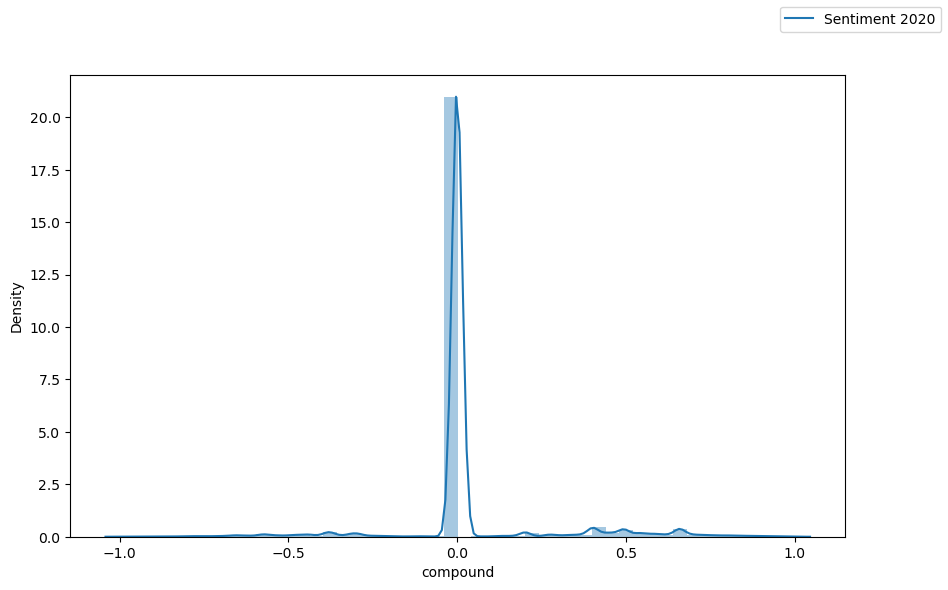

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_21700\3782029770.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plot['compound'], hist = True)


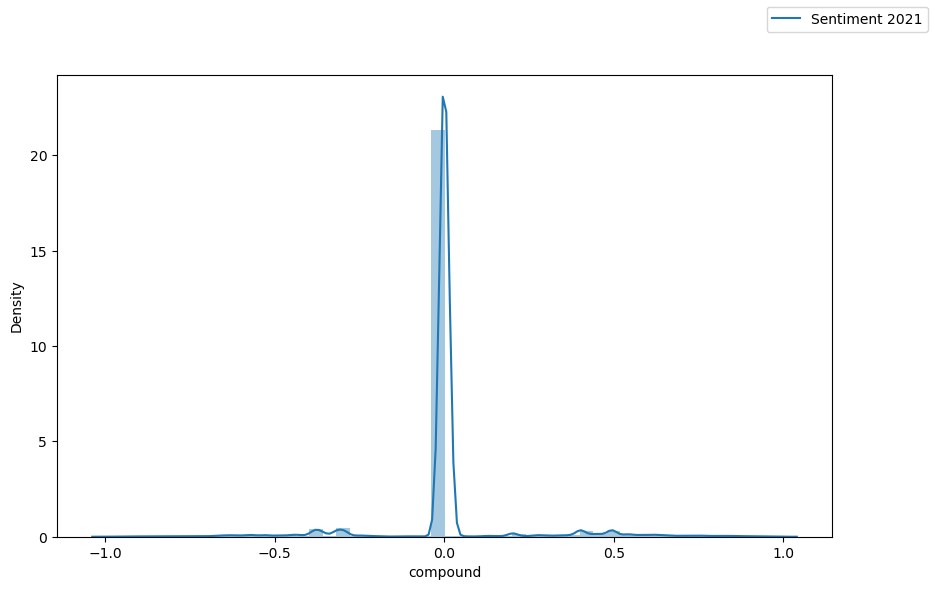

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_21700\3782029770.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plot['compound'], hist = True)


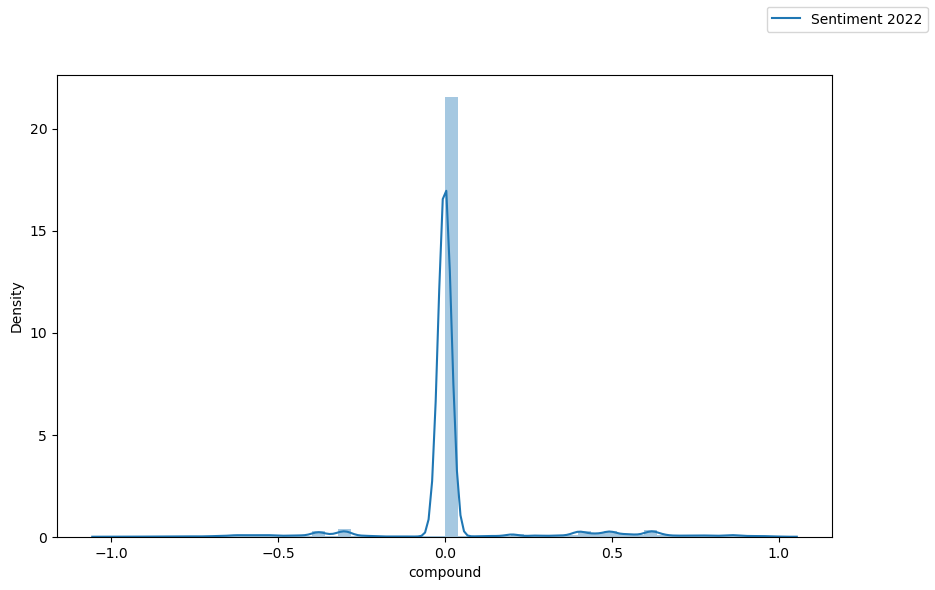

In [56]:
# plot sentiment distribution by year

import seaborn as sns
for year in df_n.year.unique():
    fig = plt.figure(figsize=(10,6))
    label = "Sentiment "+str(year)
    plot=df_n.loc[df_n['year'] == year]
    sns.distplot(plot['compound'], hist = True)
    fig.legend(labels=["Sentiment "+str(year)])
    plt.show()

In [57]:

df_n.index = pd.to_datetime(df_n.index)
sentiment=df_n['compound'].resample("M").mean()
polarity=df_n['polarity'].resample("M").mean()

In [58]:
sentiment = sentiment.fillna(0)
polarity = polarity.fillna(0)

In [59]:
sentiment

Post Created Date
2020-03-31    0.050304
2020-04-30    0.049223
2020-05-31    0.048876
2020-06-30    0.038279
2020-07-31    0.025091
2020-08-31    0.021957
2020-09-30    0.021038
2020-10-31    0.024458
2020-11-30    0.018580
2020-12-31    0.014368
2021-01-31    0.004398
2021-02-28    0.008323
2021-03-31    0.005987
2021-04-30    0.008568
2021-05-31    0.012327
2021-06-30    0.015649
2021-07-31    0.015066
2021-08-31    0.013820
2021-09-30    0.004813
2021-10-31    0.002131
2021-11-30    0.006831
2021-12-31    0.011855
2022-01-31    0.007511
2022-02-28    0.015032
2022-03-31    0.024921
2022-04-30    0.040716
2022-05-31    0.053833
2022-06-30    0.070210
Freq: M, Name: compound, dtype: float64

In [60]:
polarity

Post Created Date
2020-03-31    0.508691
2020-04-30    0.500486
2020-05-31    0.474099
2020-06-30    0.432799
2020-07-31    0.337886
2020-08-31    0.292887
2020-09-30    0.294904
2020-10-31    0.294081
2020-11-30    0.195288
2020-12-31    0.114818
2021-01-31    0.018952
2021-02-28    0.078001
2021-03-31    0.026906
2021-04-30    0.063775
2021-05-31    0.131679
2021-06-30    0.220595
2021-07-31    0.203798
2021-08-31    0.175637
2021-09-30    0.005444
2021-10-31   -0.041698
2021-11-30    0.035785
2021-12-31    0.089837
2022-01-31    0.050377
2022-02-28    0.130553
2022-03-31    0.299931
2022-04-30    0.429142
2022-05-31    0.467580
2022-06-30    0.502108
Freq: M, Name: polarity, dtype: float64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\andrei.savescu\AppData\Local\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plot', 'text', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


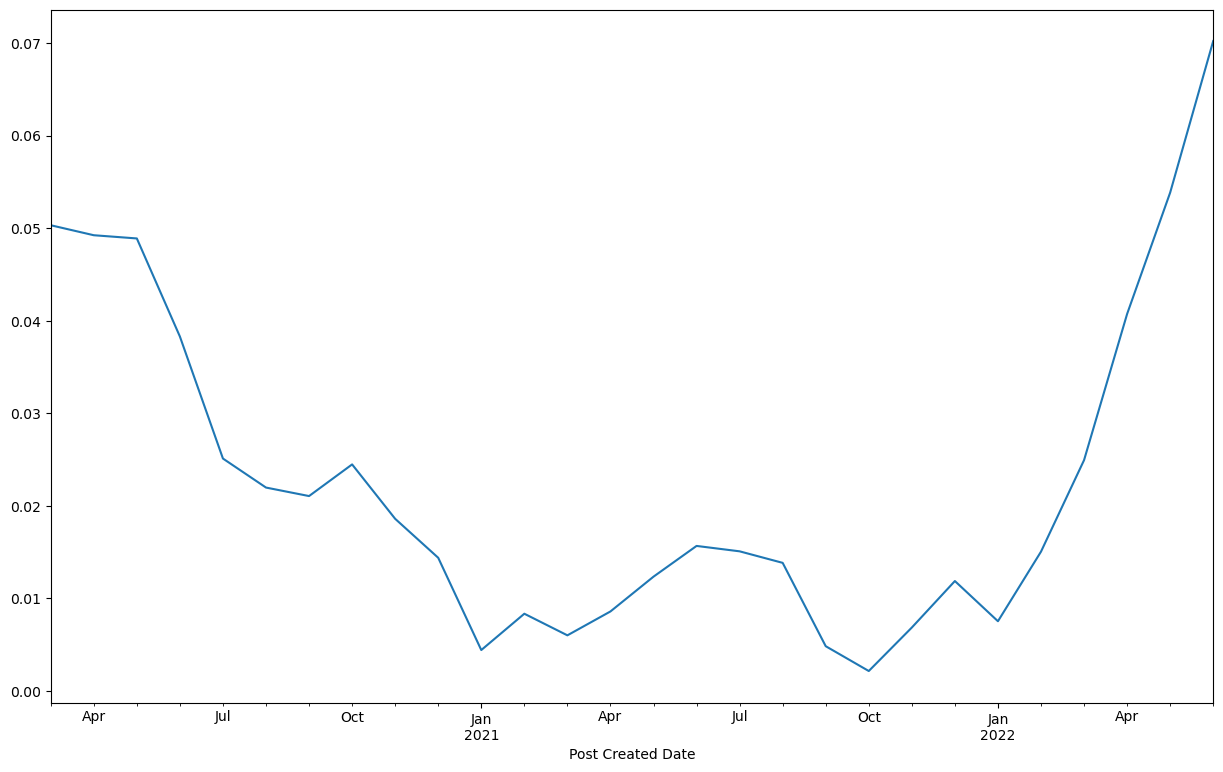

In [61]:
#import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline


pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(0.0, 2.0)

sentiment.plot()
plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


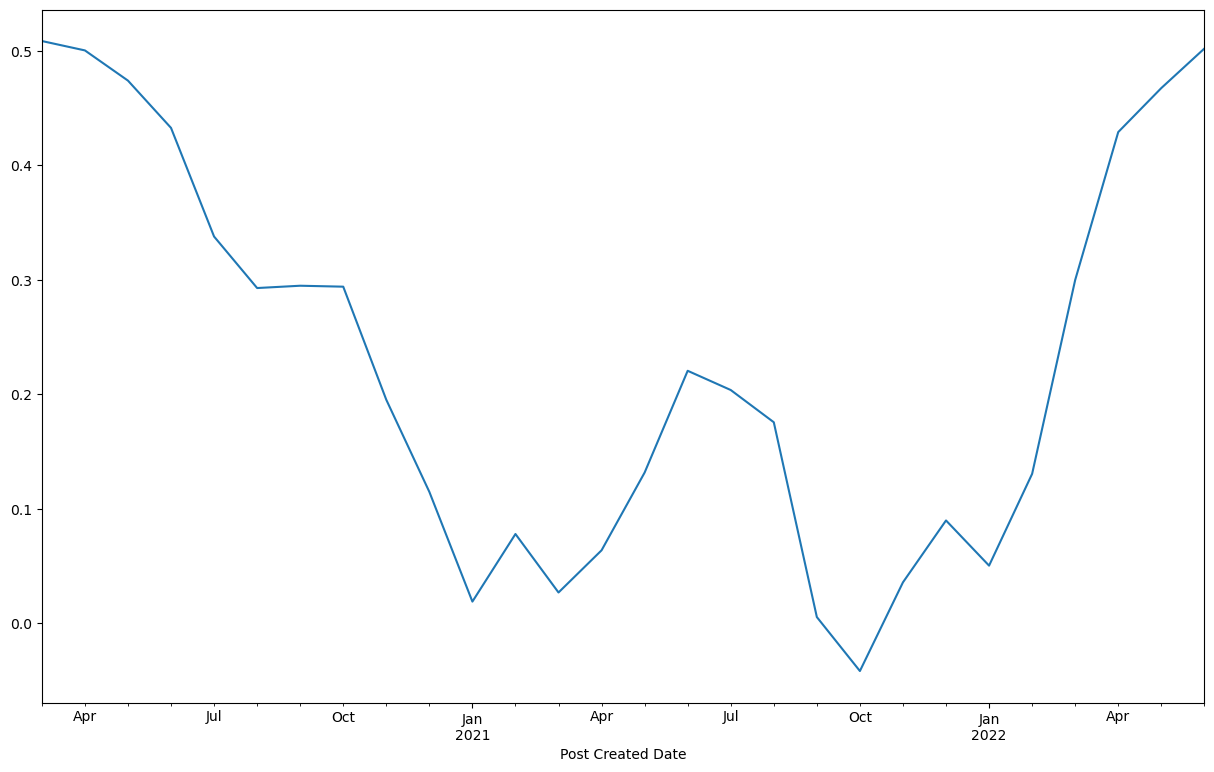

In [62]:
#import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline


pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(0.0, 2.0)

polarity.plot()
plt.show()

# Comparatie sentiment cu numar oficial cazuri COVID

In [61]:
cov = pd.read_csv("Cazuri_COVID_RO.csv")
cov

,Date,total,new_cases
0,2020-03-24,576,143
1,2020-03-25,762,186
2,2020-03-26,906,144
3,2020-03-27,1029,123
4,2020-03-28,1292,263
...,...,...,...
824,2022-06-26,2915487,0
825,2022-06-27,2919461,3974
826,2022-06-28,2919461,0
827,2022-06-29,2919461,0


In [62]:
cov.set_index('Date', inplace=True)

In [63]:
cov.index = pd.to_datetime(cov.index)
cov_m=cov['new_cases'].resample("M").mean()

In [64]:
cov_m

Date
2020-03-31      189.875000
2020-04-30      334.200000
2020-05-31      230.806452
2020-06-30      248.300000
2020-07-31      742.225806
2020-08-31     1199.806452
2020-09-30     1287.633333
2020-10-31     3553.935484
2020-11-30     7865.000000
2020-12-31     5045.322581
2021-01-31     3192.806452
2021-02-28     2580.214286
2021-03-31     4757.516129
2021-04-30     3566.066667
2021-05-31      772.741935
2021-06-30      105.200000
2021-07-31       73.967742
2021-08-31      465.129032
2021-09-30     4139.466667
2021-10-31    13515.193548
2021-11-30     4581.266667
2021-12-31      941.225806
2022-01-31    12553.903226
2022-02-28    19011.892857
2022-03-31     3931.322581
2022-04-30     1413.033333
2022-05-31      506.935484
2022-06-30      358.566667
Freq: M, Name: new_cases, dtype: float64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


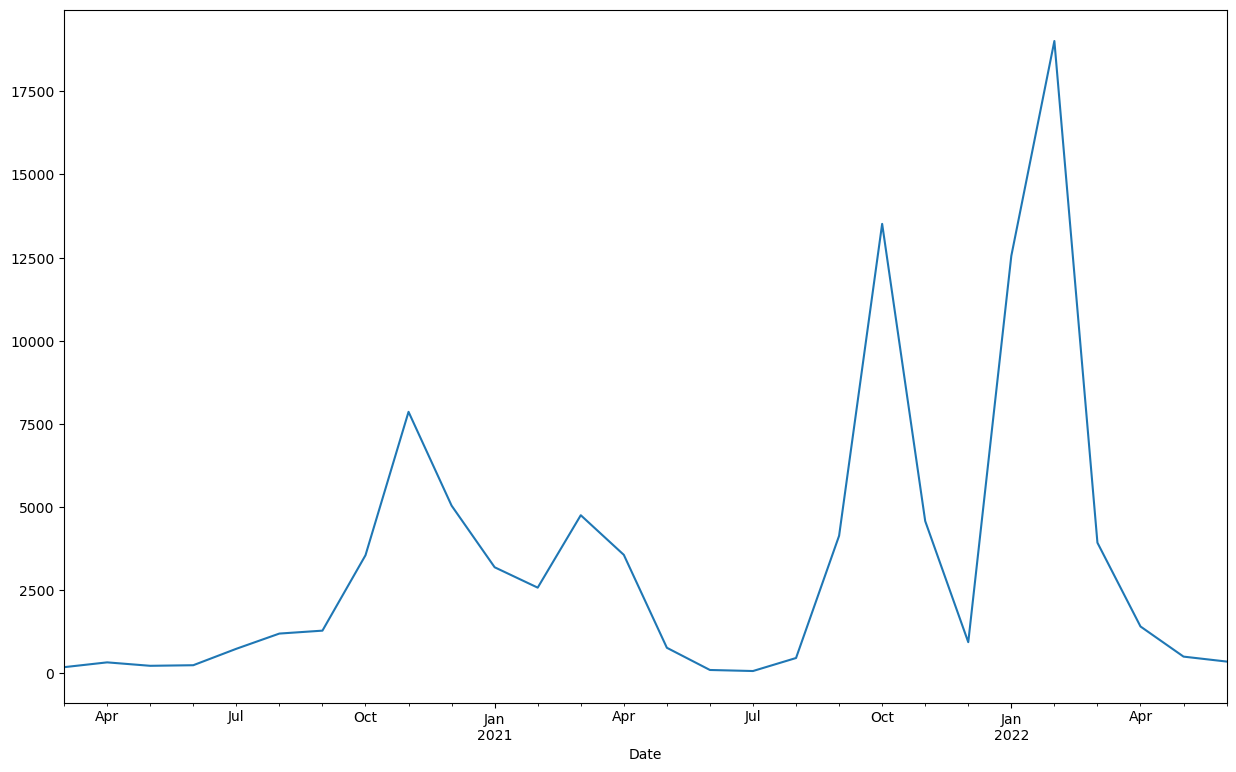

In [65]:
#import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline


pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(0.0, 2.0)

cov_m.plot()
plt.show()

# Analiza cu TextBlob

In [66]:
from textblob import TextBlob

In [67]:
 df_n['clean_post']

0         Si-a jos costumul cravata presedinte imbracat ...
1         Despre Vitamina C - s-a intamplat aprobarea in...
2         O bine Chiar cred asta. M-am nascut 1980 aproa...
3         Asa arata medic munca grea salvarea vietii bol...
4         VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
                                ...                        
949884    Spaniolul Roberto Bautista Agut anuntat joi s-...
949885    Spaniolul Roberto Bautista Agut anuntat joi s-...
949886    Numarul cazurilor COVID crescut considerabil u...
949887    Numarul cazurilor COVID crescut considerabil u...
949888    Printre tari regasesc Franta, Portugalia, Ital...
Name: clean_post, Length: 949882, dtype: object

In [23]:
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return 'Positive'
    elif sentiment_polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [24]:
df_n['TextBlob Sentiment'] = df_n['clean_post'].apply(get_sentiment_textblob)
print(df_n.head())

  Post Created Date                               Page Name  \
0        2020-03-24                          Floriana Jucan   
1        2020-03-11                       Dr. Mihail Pautov   
2        2020-03-16                          Codin Maticiuc   
3        2020-03-15               Sarbatori alaturi de tine   
4        2020-03-11  Ministerul Afacerilor Interne, Romania   

             User Name      Facebook Id            Page Category  \
0     iamflorianajucan  100044342683507               JOURNALIST   
1         doctormihail  340640989728926                  SURGEON   
2       codin.maticiuc  100050227700665                   PERSON   
3    sarbatoriimpreuna  100064316577159  GOVERNMENT_ORGANIZATION   
4  ministeruldeinterne  100069007606112  GOVERNMENT_ORGANIZATION   

  Page Admin Top Country                                   Page Description  \
0                     RO  Viaţa mea a fost câteodată fiară, câteodată fl...   
1                     RO               Medic Specialis

C:\Users\andrei.savescu\AppData\Local\Temp\ipykernel_30124\3091559391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['TextBlob Sentiment'] = df_n['clean_post'].apply(get_sentiment_textblob)


In [73]:
def get_num_textblob(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    return sentiment_polarity

In [74]:
df_n['TextBlob'] = df_n['clean_post'].apply(get_num_textblob)
print(df_n.head())

                                                Page Name  \
Post Created Date                                           
2020-03-24                                 Floriana Jucan   
2020-03-11                              Dr. Mihail Pautov   
2020-03-16                                 Codin Maticiuc   
2020-03-15                      Sarbatori alaturi de tine   
2020-03-11         Ministerul Afacerilor Interne, Romania   

                             User Name      Facebook Id  \
Post Created Date                                         
2020-03-24            iamflorianajucan  100044342683507   
2020-03-11                doctormihail  340640989728926   
2020-03-16              codin.maticiuc  100050227700665   
2020-03-15           sarbatoriimpreuna  100064316577159   
2020-03-11         ministeruldeinterne  100069007606112   

                             Page Category Page Admin Top Country  \
Post Created Date                                                   
2020-03-24          

In [75]:
df_n.set_index('Post Created Date', inplace=True)

KeyError: "None of ['Post Created Date'] are in the columns"

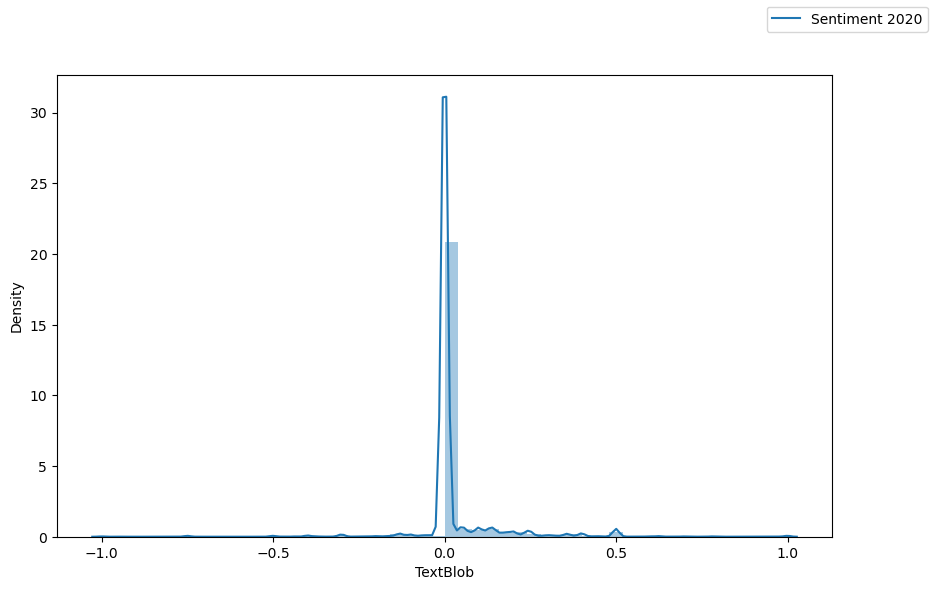

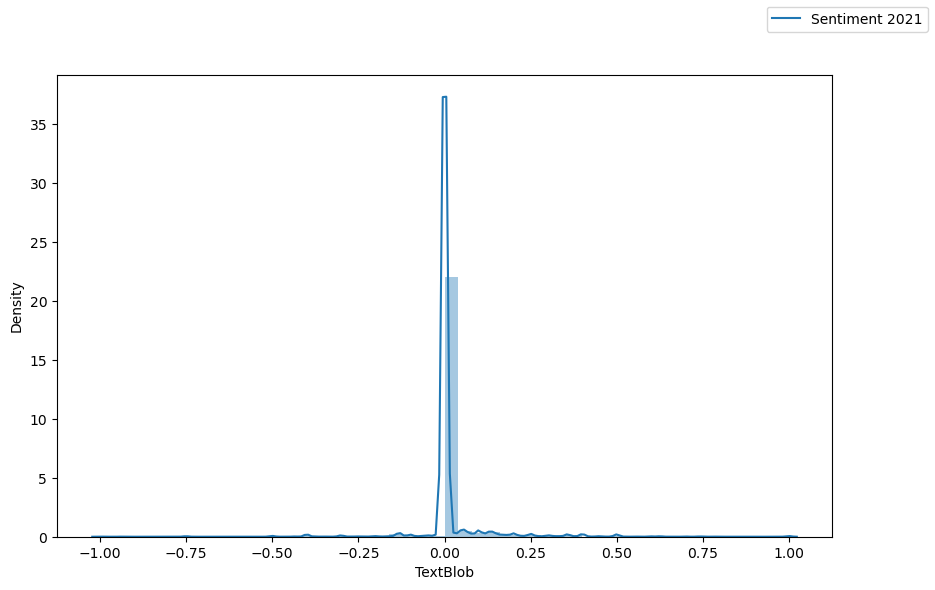

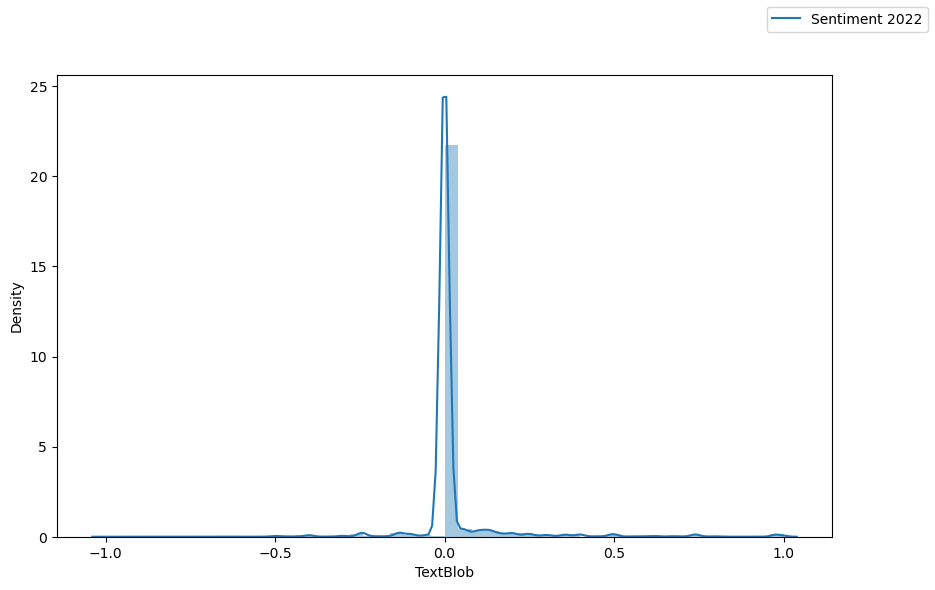

In [76]:
import seaborn as sns
for year in df_n.year.unique():
    fig = plt.figure(figsize=(10,6))
    label = "Sentiment "+str(year)
    plot=df_n.loc[df_n['year'] == year]
    sns.distplot(plot['TextBlob'], hist = True)
    fig.legend(labels=["Sentiment "+str(year)])
    plt.show()

In [78]:
df_n.index = pd.to_datetime(df_n.index)


In [79]:
sentiment=df_n['TextBlob'].resample("M").mean()

In [7]:
sentiment

NameError: name 'sentiment' is not defined

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


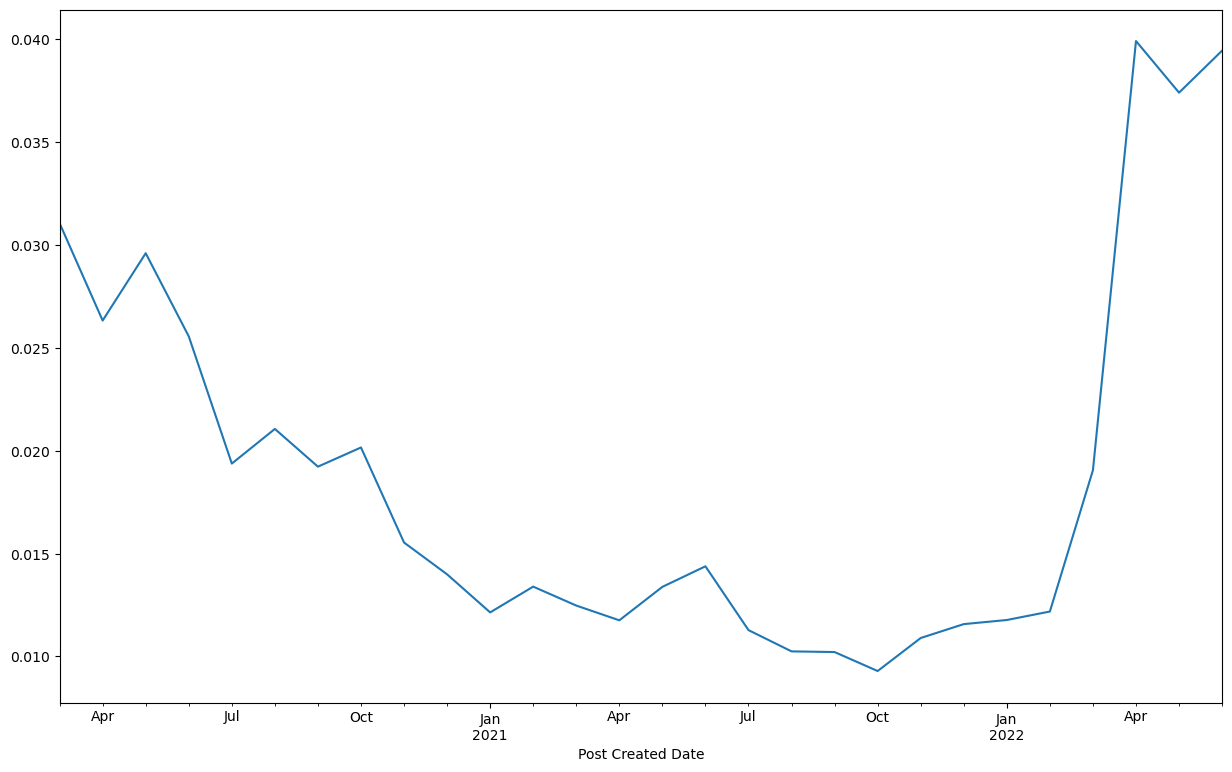

In [81]:
#import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline


pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(0.0, 2.0)

sentiment.plot()
plt.show()

# Cauzalitate Granger + Regresii

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data=pd.merge(sentiment,  cov_m, left_index=True, right_index=True)
data

NameError: name 'sentiment' is not defined

In [84]:
max = data['new_cases'].max()
min=data['new_cases'].min()

data['cases_normalizat']=(data['new_cases']-min)/(max-min)

In [55]:
data

NameError: name 'data' is not defined

In [87]:
plt.figure(figsize=(10,4))
plt.plot(data['cases_normalizat'], color='b')
plt.plot((data["TextBlob"], color='r')

plt.legend(['Cazuri', 'Sentiment'], fontsize=16)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2068155183.py, line 3)

In [86]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "cases_normalizat~ TextBlob ", data=data).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:       cases_normalizat   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.674
Date:                Fri, 02 Jun 2023   Prob (F-statistic):             0.0248
Time:                        18:28:16   Log-Likelihood:                 2.9961
No. Observations:                  28   AIC:                            -1.992
Df Residuals:                      26   BIC:                            0.6722
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3866      0.097      3.990      0.0

In [54]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['cases_normalizat'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

NameError: name 'data' is not defined

In [88]:
gn_df = pd.DataFrame(columns=['cazuri', 'sentiment'], data=zip(data['cases_normalizat'],data["TextBlob"]))
gn_df                                                                                            

,cazuri,sentiment
0,0.006120,0.031066
1,0.013741,0.026334
2,0.008282,0.029608
3,0.009205,0.025565
4,0.035287,0.019380
5,0.059449,0.021064
6,0.064087,0.019229
7,0.183757,0.020162
8,0.411398,0.015540
9,0.262508,0.013994


In [89]:
gc_res = grangercausalitytests(gn_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1554  , p=0.1551  , df_denom=24, df_num=1
ssr based chi2 test:   chi2=2.4248  , p=0.1194  , df=1
likelihood ratio test: chi2=2.3220  , p=0.1276  , df=1
parameter F test:         F=2.1554  , p=0.1551  , df_denom=24, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8883  , p=0.1761  , df_denom=21, df_num=2
ssr based chi2 test:   chi2=4.6757  , p=0.0965  , df=2
likelihood ratio test: chi2=4.2997  , p=0.1165  , df=2
parameter F test:         F=1.8883  , p=0.1761  , df_denom=21, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7384  , p=0.1950  , df_denom=18, df_num=3
ssr based chi2 test:   chi2=7.2433  , p=0.0645  , df=3
likelihood ratio test: chi2=6.3609  , p=0.0953  , df=3
parameter F test:         F=1.7384  , p=0.1950  , df_denom=18, df_num=3


# LDA

In [ ]:
from gensim.models.ldamulticore import LdaMulticore

In [48]:
import pandas as pd
import gensim
from gensim import corpora, models
import pyLDAvis
from gensim.models import LdaModel

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [17]:
 df_n['clean_post']

0         Si-a jos costumul cravata presedinte imbracat ...
1         Despre Vitamina C - s-a intamplat aprobarea in...
2         O bine Chiar cred asta. M-am nascut 1980 aproa...
3         Asa arata medic munca grea salvarea vietii bol...
4         VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
                                ...                        
949884    Spaniolul Roberto Bautista Agut anuntat joi s-...
949885    Spaniolul Roberto Bautista Agut anuntat joi s-...
949886    Numarul cazurilor COVID crescut considerabil u...
949887    Numarul cazurilor COVID crescut considerabil u...
949888    Printre tari regasesc Franta, Portugalia, Ital...
Name: clean_post, Length: 949882, dtype: object

In [18]:
df_split = pd.DataFrame()
df_split =  df_n['clean_post']
df_split

0         Si-a jos costumul cravata presedinte imbracat ...
1         Despre Vitamina C - s-a intamplat aprobarea in...
2         O bine Chiar cred asta. M-am nascut 1980 aproa...
3         Asa arata medic munca grea salvarea vietii bol...
4         VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
                                ...                        
949884    Spaniolul Roberto Bautista Agut anuntat joi s-...
949885    Spaniolul Roberto Bautista Agut anuntat joi s-...
949886    Numarul cazurilor COVID crescut considerabil u...
949887    Numarul cazurilor COVID crescut considerabil u...
949888    Printre tari regasesc Franta, Portugalia, Ital...
Name: clean_post, Length: 949882, dtype: object

In [19]:
#clean the data
stop = set(stopwords.words('romanian'))
exclude = set(string.punctuation)

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([word for word in punc_free.split()])
    return normalized.split()

In [20]:
df_split['split_post'] =df_split.apply(clean)

In [21]:
df_split['split_post']


0         [sia, jos, costumul, cravata, presedinte, imbr...
1         [vitamina, c, sa, intamplat, aprobarea, incepe...
2         [bine, cred, asta, mam, nascut, 1980, aproape,...
3         [arata, medic, munca, grea, salvarea, vietii, ...
4         [rugam, sprijiniti, distribuirea, acestor, rec...
                                ...                        
949884    [spaniolul, roberto, bautista, agut, anuntat, ...
949885    [spaniolul, roberto, bautista, agut, anuntat, ...
949886    [numarul, cazurilor, covid, crescut, considera...
949887    [numarul, cazurilor, covid, crescut, considera...
949888    [printre, tari, regasesc, franta, portugalia, ...
Name: clean_post, Length: 949882, dtype: object

In [22]:
#create dictionary
dictionary = corpora.Dictionary(df_split['split_post'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

31912132


In [ ]:
.iloc[:50000]

In [31]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_split['split_post']]
print(len(doc_term_matrix))

949882


In [39]:
lda = gensim.models.LdaModel

In [40]:
num_topics=6
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=30,minimum_probability=0)

CPU times: total: 2h 57min 33s
Wall time: 2h 59min 2s


In [41]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.018*"covid" + 0.015*"covid19" + 0.008*"sa" + 0.007*"doza" + 0.006*"romania" + 0.005*"sau" + 0.005*"ani" + 0.004*"acum" + 0.004*"facut" + 0.004*"cauza"'),
 (1,
  '0.017*"persoane" + 0.016*"medicul" + 0.015*"urgenta" + 0.015*"covid19" + 0.012*"familie" + 0.012*"incidenta" + 0.010*"starii" + 0.010*"publica" + 0.009*"nr" + 0.009*"masca"'),
 (2,
  '0.033*"lei" + 0.032*"zile" + 0.016*"persoana" + 0.013*"camera" + 0.012*"1" + 0.011*"euro" + 0.010*"2" + 0.010*"10" + 0.010*"tariful" + 0.009*"hotel"'),
 (3,
  '0.013*"milioane" + 0.009*"ue" + 0.008*"the" + 0.007*"romania" + 0.007*"europene" + 0.006*"europeana" + 0.006*"euro" + 0.006*"european" + 0.005*"pfizer" + 0.005*"guvernul"'),
 (4,
  '0.039*"cazuri" + 0.029*"persoane" + 0.029*"24" + 0.026*"ore" + 0.025*"ultimele" + 0.021*"covid19" + 0.016*"covid" + 0.014*"decese" + 0.012*"2" + 0.012*"pacienti"'),
 (5,
  '0.014*"covid19" + 0.010*"vaccinare" + 0.010*"sanatatii" + 0.008*"impotriva" + 0.005*"vaccinate" + 0.005*"vaccin" + 0.005*"sanatat

In [52]:
pyLDAvis.enable_notebook()

In [53]:
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [44]:
lda_corpus = ldamodel[doc_term_matrix]

In [55]:
[doc for doc in lda_corpus]

[[(0, 0.031813394), (1, 0.9367649), (2, 0.031421673)],
 [(0, 0.045418024), (1, 0.89835566), (2, 0.056226313)],
 [(0, 0.0481464), (1, 0.9507125), (2, 0.0011410911)],
 [(0, 0.015304926), (1, 0.97227967), (2, 0.012415433)],
 [(0, 0.5087609), (1, 0.4462619), (2, 0.044977166)],
 [(0, 0.50876105), (1, 0.44626203), (2, 0.044976894)],
 [(0, 0.077188924), (1, 0.8754175), (2, 0.04739355)],
 [(0, 0.042817123), (1, 0.9119662), (2, 0.045216646)],
 [(0, 0.2595746), (1, 0.59585017), (2, 0.14457528)],
 [(0, 0.09003067), (1, 0.87609226), (2, 0.033877097)],
 [(0, 0.09746565), (1, 0.8830112), (2, 0.019523129)],
 [(0, 0.27882853), (1, 0.6653142), (2, 0.05585721)],
 [(0, 0.0061668935), (1, 0.9032343), (2, 0.09059875)],
 [(0, 0.21595678), (1, 0.76104015), (2, 0.023003133)],
 [(0, 0.27610707), (1, 0.55542934), (2, 0.16846363)],
 [(0, 0.25639534), (1, 0.73224956), (2, 0.011355049)],
 [(0, 0.1902926), (1, 0.7748946), (2, 0.03481281)],
 [(0, 0.017811347), (1, 0.96456677), (2, 0.017621871)],
 [(0, 0.046296444), 

In [56]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))

threshold = sum(scores)/len(scores)
print(threshold)

0.3333333333429291


In [57]:
cluster1 = [j for i,j in zip(lda_corpus,df_split.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,df_split.index) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,df_split.index) if i[2][1] > threshold]
# cluster4 = [j for i,j in zip(lda_corpus,df.index) if i[3][1] > threshold]
# cluster5 = [j for i,j in zip(lda_corpus,df.index) if i[4][1] > threshold]

print(len(cluster1))
print(len(cluster2))
print(len(cluster3))

201627
695057
222601


In [59]:
df_split.iloc[cluster1]

4         VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
5         VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
27        Dragul elev, Cursurile s-au suspendat rost pan...
31        Va rugam sprijiniti distribuire ORDONANTA MILI...
36        Criza Covid-19 amploare. Inca putem cate ceva....
                                ...                        
949849    30 IUNIE 2022: La nivelul judetului Bistrita-N...
949864    Ce trebuie stie romanii noul val Covid-19 -->>...
949877    Valul 6 coronavirus, toamna. Valul 6 pandemiei...
949878    Odata controlul efectiv pandemiei COVID-19, ec...
949887    Numarul cazurilor COVID crescut considerabil u...
Name: clean_post, Length: 201627, dtype: object

In [98]:
df_split.iloc[cluster1].head(10)

4     VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
5     VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
27    Dragul elev, Cursurile s-au suspendat rost pan...
31    Va rugam sprijiniti distribuire ORDONANTA MILI...
36    Criza Covid-19 amploare. Inca putem cate ceva....
48    Cod Portocaliu Covid-19 Republica Moldova. Anu...
51    Astazi, duminica 29 martie 2020 loc campanie i...
60    Tinand cont gravitatea situatiei cauzata raspa...
68    Avand vedere contextul creat Covid-19, produse...
69    Sanatatea angajatilor, clientilor partenerilor...
Name: clean_post, dtype: object

In [101]:
df_split.iloc[cluster3]

47        VA RUGAM SA NE SPRIJINITI PRIN DISTRIBUIREA AC...
71        INFORMATI-VA DOAR DIN SURSE OFICIALE Apelati r...
108       Va rugam informati surse oficiale Rugam distri...
132       Masuri preventie - COVID-19 #Coronavirus #COVID19
137       VA RUGAM SA VA INFORMATI DOAR DIN SURSE OFICIA...
                                ...                        
949860    Asa bine stiti, proiectul Hektomeron, initiat ...
949862    Livrarile urmeaza inceapa sfarsitul verii cont...
949872    Comitetul Organizare Jocurilor Olimpice Parali...
949882    Cu crestere 13% nivel european 2021, pana 718 ...
949888    Printre tari regasesc Franta, Portugalia, Ital...
Name: clean_post, Length: 222601, dtype: object

In [ ]:
vizualizat 949872, si 949878

In [59]:
#topic 3
pd.set_option('display.max_colwidth', None)
df_n["Message"].loc[[71]]

71    INFORMATI-VA DOAR DIN SURSE OFICIALE i Apelati in primul rand medicul de familie, daca aveti febra sau tusiti si ati calatorit in tari unde s-au inregistrat cazuri de coronavirus ori ati intrat in contact cu persoane infectate cu noul coronavirus. i Apelati 112 numai in cazuri de urgenta, daca nu ati putut contacta medicul de familie sau daca starea dumneavoastra de sanatate s-a agravat brusc. i Comunicati medicului de familie sau dispecerului 112 motivul suspiciunii dumneavoastra in legatura cu infectarea cu noul coronavirus. i Aflati informatii suplimentare despre noul coronavirus (COVID-19) de la TelVerde 0800 800 358. Acesta este un numar pentru informare, NU este un numar pentru urgente! i TelVerde este operationalizat la nivelul Institutului National de Sanatate Publica din subordinea Ministerului Sanatatii pentru cetatenii care doresc informatii legate de prevenirea infectarii cu virusul COVID  19 (coronavirus). Aceasta este o campanie de informare desfasurata de Crucea Ro

In [62]:
#topic1
pd.set_option('display.max_colwidth', None)
df_n["Message"].loc[[949877]]

949877    Valul 6 de coronavirus, la toamna. Valul 6 al pandemiei de Covid, asteptat in Romania?! Anuntul facut de Adrian Marinescu
Name: Message, dtype: object